# Preparación del modelo

## Importación de librerías

In [92]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

# Carga de datos

## Geodataframe

In [93]:
agebs = gpd.read_file('data/colima/agebs.gpkg')
agebs["area"] = agebs.area / 1000 # ha
agebs.drop(columns=["CVE_ENT","CVE_MUN", "CVE_AGEB","CVE_LOC","geometry"], inplace=True)
agebs = pd.DataFrame(agebs)

## Zonal Statistics

In [94]:
df0 = pd.read_csv('data/megaGDF.csv')
df0.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC", "_count","_sum"], inplace=True)
df0.head()

,CVEGEO,CVE_AGEB,_mean,class,time
0,0600200010676,0676,NaN,Depth,0
1,0600200010727,0727,NaN,Depth,0
2,0600200011142,1142,NaN,Depth,0
3,0600200010411,0411,NaN,Depth,0
4,0600200011068,1068,NaN,Depth,0


In [95]:
df = df0.pivot_table(index=["CVEGEO",'CVE_AGEB',"time"], columns='class', values=["_mean"])
df.reset_index(inplace=True)
# remove double header
df.columns = df.columns.droplevel(0)
df.columns = ['CVEGEO', 'CVE_AGEB',"time", 'Depth', 'Rain', 'Velocity']
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity
0,0600200010318,0318,0,NaN,0.00,NaN
1,0600200010318,0318,300,NaN,0.00,NaN
2,0600200010318,0318,600,NaN,0.72,NaN
3,0600200010318,0318,900,NaN,0.72,NaN
4,0600200010318,0318,1200,NaN,1.38,NaN
...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683
2124,0601000010362,0362,23400,0.016851,8.76,0.070517
2125,0601000010362,0362,23700,0.016796,8.76,0.070501
2126,0601000010362,0362,24000,0.016748,7.80,0.070419


In [96]:
df = df.merge(agebs, on="CVEGEO")
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144
...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848


## Denue and INV

In [43]:
denue_inv = pd.read_csv('data/denue_inv.csv')
denue_inv.head()

,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,VPH_DREN_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0273,74,6.349231,7.081538,13.980769,3.403077,3.540769,30.769231,29.486923,400.00,...,39,39,38,31,39,39,39,1.0,0.0,0.0
1,0318,1925,11.397551,17.568980,31.385102,10.333878,7.330000,85.303878,85.473878,4188.22,...,143,128,115,81,144,146,143,13.0,6.0,0.0
2,0322,2143,11.647736,17.747170,30.118113,11.442453,7.085472,88.486038,88.553396,4693.33,...,155,150,144,70,159,155,151,13.0,3.0,3.0
3,0362,2342,18.422286,21.292000,33.820000,9.617714,5.100857,91.145714,91.380857,3198.33,...,103,102,97,45,105,102,102,4.0,1.0,1.0
4,0411,1116,9.866053,17.035000,33.167105,11.912895,4.348947,81.578947,81.578947,3100.00,...,113,112,109,66,47,113,111,12.0,2.0,0.0


## Join

In [117]:
df_full = df.merge(denue_inv, on="CVE_AGEB")
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144,1925,11.397551,17.56898,...,143,128,115,81,144,146,143,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848,2342,18.422286,21.29200,...,103,102,97,45,105,102,102,4.0,1.0,1.0


In [118]:
list_area = ["POBTOT",'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C',
       'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C',
       'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C',
       'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia', 'hospital']

for i in list_area:
    df_full[i] = df_full[i] / df_full["area"]

In [119]:
df_full.columns

Index(['CVEGEO', 'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area',
       'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P',
       'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C',
       'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C',
       'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C',
       'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia',
       'hospital'],
      dtype='object')

In [120]:
df_full.replace([np.nan], 0, inplace=True)

df_full.dropna(subset="Depth",inplace=True)
df_full.drop(columns=["CVEGEO","area"], inplace=True)

In [121]:
df_full.describe()

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,12127.161654,0.187875,5.140376,0.527384,4.907563,13.715332,18.723482,33.262518,10.481927,5.761340,...,0.294701,0.280747,0.268686,0.155014,0.283031,0.295730,0.291821,0.020800,0.007161,0.002585
std,7089.632672,0.230293,7.006402,0.630019,2.463613,4.298687,2.715630,3.538077,1.518658,2.720430,...,0.098596,0.101653,0.096795,0.049552,0.110762,0.095936,0.096671,0.014787,0.007274,0.003263
min,0.000000,0.000000,0.000000,0.000000,0.763735,5.978372,13.757209,26.724800,7.758302,1.448605,...,0.155521,0.151374,0.140659,0.081039,0.072710,0.155521,0.155521,0.004147,0.000000,0.000000
25%,6000.000000,0.000000,1.140000,0.000000,2.961125,10.981154,17.035000,30.118113,9.569600,2.937368,...,0.221345,0.197157,0.187864,0.109205,0.208822,0.226925,0.221345,0.008389,0.003668,0.000000
50%,12000.000000,0.094626,2.220000,0.265657,4.742263,12.719286,19.053636,33.346176,10.210981,5.850000,...,0.260760,0.251447,0.235150,0.155901,0.257202,0.266590,0.258606,0.015385,0.005178,0.002142
75%,18300.000000,0.281485,7.200000,0.912471,5.942048,15.677234,20.527500,35.534118,11.442453,7.507209,...,0.376356,0.376356,0.351083,0.190500,0.376356,0.376356,0.373989,0.031621,0.008164,0.004402
max,24300.000000,1.005461,36.300000,2.407312,10.310057,25.316415,25.398293,40.178511,13.536364,10.405106,...,0.486407,0.481543,0.452359,0.248068,0.496135,0.457223,0.476679,0.059733,0.032164,0.012701


# Modelo

In [122]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

El archivo CSV 'datos_inundacion.csv' deberá contener las variables de entrada (características) y la variable de salida (nivel de inundación).

A continuación, separamos las características de la variable de salida y dividimos los datos en conjuntos de entrenamiento y prueba:

python

In [123]:
# Dividimos los datos en características y variable objetivo
X = df_full.drop('Depth', axis=1)
y = df_full['Depth']

In [124]:
# Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:

In [125]:

# Normalizamos las características
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std


C:\Users\pedro\AppData\Local\Temp\ipykernel_24700\2612543892.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = X_train.mean(axis=0)
C:\Users\pedro\AppData\Local\Temp\ipykernel_24700\2612543892.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = X_train.std(axis=0)


Ahora, construimos la red neuronal utilizando la API secuencial de Keras de TensorFlow:

In [126]:

# Construimos la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

La red neuronal tiene dos capas ocultas de 64 neuronas cada una con una función de activación ReLU y una capa de salida con una neurona sin función de activación.

Finalmente, compilamos y entrenamos la red neuronal con los datos de entrenamiento:

In [127]:
X_train_norm

,ACESOAUT_C,ALUMPUB_C,ARBOLES_C,BANQUETA_C,CICLOCAR_C,CICLOVIA_C,CVE_AGEB,DRENAJEP_C,GRAPROES,P15A29A_P,...,SEMAAUDI_C,TRANSCOL_C,VPH_C_EL_P,VPH_DREN_P,VPH_EXSA_P,Velocity,escuela,farmacia,hospital,time
1233,-0.855999,-1.276006,-1.494387,-0.949317,-1.114955,-1.128392,NaN,-1.029001,-0.901472,-0.528122,...,-1.089723,-1.255129,-2.445649,-2.047920,-2.465616,-0.830973,-0.901258,-0.649838,0.733023,-1.435744
480,-0.240962,-0.451793,-0.437972,-0.450083,-0.448445,-0.424083,NaN,-0.925508,0.372137,-0.707205,...,-0.490161,-0.418179,-0.486464,-1.340113,-0.502098,0.754788,1.182983,-0.992418,3.163443,1.301775
1111,-0.187809,-0.308429,-1.109294,-0.516742,-0.365055,-0.339139,NaN,-0.295564,1.268168,-0.460415,...,-0.342908,-0.350984,-0.166235,-0.116421,-0.181161,-0.432363,-0.769326,-0.018049,-0.799351,0.333115
1303,-0.855999,-1.276006,-1.494387,-0.949317,-1.114955,-1.128392,NaN,-1.029001,-0.901472,-0.528122,...,-1.089723,-1.255129,-2.445649,-2.047920,-2.465616,-0.341918,-0.901258,-0.649838,0.733023,1.512354
861,-0.480770,-0.585724,0.286835,-0.613303,-0.774692,-0.679465,NaN,-0.719333,0.494444,0.425721,...,-0.732055,-0.837888,1.173788,0.936440,1.097210,1.428823,0.743356,0.304977,0.361310,0.164652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.311875,-0.422027,0.087235,-0.409388,-0.475976,-0.452125,NaN,-0.543539,1.005335,0.122021,...,-0.479362,-0.310651,1.403830,-0.001302,1.402611,-0.830973,1.911089,0.800602,0.002674,-1.646322
1095,-0.187809,-0.308429,-1.109294,-0.516742,-0.365055,-0.339139,NaN,-0.295564,1.268168,-0.460415,...,-0.342908,-0.350984,-0.166235,-0.116421,-0.181161,0.641183,-0.769326,-0.018049,-0.799351,-0.340736
1130,-0.187809,-0.308429,-1.109294,-0.516742,-0.365055,-0.339139,NaN,-0.295564,1.268168,-0.460415,...,-0.342908,-0.350984,-0.166235,-0.116421,-0.181161,-0.366864,-0.769326,-0.018049,-0.799351,1.133312
1294,-0.855999,-1.276006,-1.494387,-0.949317,-1.114955,-1.128392,NaN,-1.029001,-0.901472,-0.528122,...,-1.089723,-1.255129,-2.445649,-2.047920,-2.465616,-0.333871,-0.901258,-0.649838,0.733023,1.133312


In [128]:
# Compilamos y entrenamos la red neuronal
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=16, validation_split=0.2)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

En este ejemplo, estamos utilizando el optimizador RMSprop y la función de pérdida MSE (mean squared error) con una métrica adicional de MAE (mean absolute error). Además, estamos entrenando la red durante 100 épocas con un tamaño de lote de 16 y una validación del 20%.

Finalmente, podemos evaluar el rendimiento del modelo con los datos de prueba y ver las predicciones para algunos ejemplos:

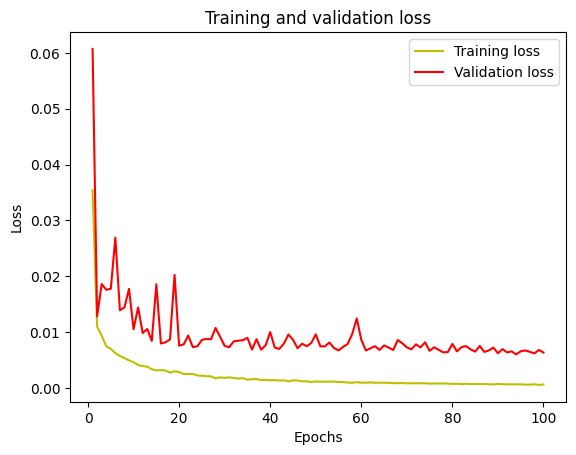

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()


In [106]:
# Evaluamos el rendimiento del modelo
mse, mae = model.evaluate(X_test_norm, y_test)

# Hacemos algunas predicciones
X_new = X_test_norm[:3]
y_pred = model.predict(X_new)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Predictions:', y_pred.flatten())


1/1 [==============================] - 0s 43ms/step
Mean squared error: 0.002702287631109357
Mean absolute error: 0.019364653155207634
Predictions: [0.45779866 0.01455278 0.34855673]
